## **Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error

In [ ]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

## **Data Collection and Analysis**

In [ ]:
df  = pd.read_csv('/content/ITC.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-1996,5.550000,5.600000,5.533333,5.583333,3.323907,985500.0
1,02-01-1996,5.466666,5.566666,5.288888,5.372222,3.198226,7470000.0
2,03-01-1996,5.133333,5.254444,5.101111,5.200000,3.095698,15160500.0
3,04-01-1996,5.200000,5.332222,5.144444,5.297777,3.153908,12397500.0
4,05-01-1996,5.297777,5.277777,5.188888,5.202222,3.097020,5008500.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6890 entries, 0 to 6889
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6890 non-null   object 
 1   Open       6879 non-null   float64
 2   High       6879 non-null   float64
 3   Low        6879 non-null   float64
 4   Close      6879 non-null   float64
 5   Adj Close  6879 non-null   float64
 6   Volume     6879 non-null   float64
dtypes: float64(6), object(1)
memory usage: 376.9+ KB


In [ ]:
df.shape

(6890, 7)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6879.000000,6879.000000,6879.000000,6879.000000,6879.000000,6.879000e+03
mean,121.511181,122.859461,120.011619,121.426830,99.025659,4.402422e+07
std,106.444634,107.405065,105.373130,106.383687,94.769531,9.927486e+07
min,4.182222,4.182222,4.144444,4.182222,2.489788,0.000000e+00
25%,18.222221,18.541666,17.889999,18.169999,11.208004,8.776656e+06
50%,72.599998,74.416664,71.000000,72.583336,51.009666,1.371964e+07
75%,219.666672,222.266663,217.333328,219.933334,181.465515,2.581413e+07
max,432.799988,433.450012,429.350006,431.450012,431.450012,1.294168e+09


## **Transform Data**

In [ ]:
columns_to_2decimal = ['Open', 'High', 'Low', 'Close']
decimal_places = 2

df[columns_to_2decimal] = np.round(df[columns_to_2decimal],decimal_places)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-1996,5.55,5.60,5.53,5.58,3.323907,985500.0
1,02-01-1996,5.47,5.57,5.29,5.37,3.198226,7470000.0
2,03-01-1996,5.13,5.25,5.10,5.20,3.095698,15160500.0
3,04-01-1996,5.20,5.33,5.14,5.30,3.153908,12397500.0
4,05-01-1996,5.30,5.28,5.19,5.20,3.097020,5008500.0
...,...,...,...,...,...,...,...
6885,10-05-2023,423.95,426.35,422.20,425.35,425.350006,9754485.0
6886,11-05-2023,427.25,427.40,418.90,420.40,420.399994,15982423.0
6887,12-05-2023,420.40,422.70,416.05,420.45,420.450012,11135894.0
6888,15-05-2023,420.00,428.70,419.05,427.80,427.799988,9151102.0


In [ ]:
columns_to_drop = ['Adj Close']
df.drop(columns=columns_to_drop, inplace = True) # inplace=true implies that no new data is created and changed in existing dataframe

columns_order = ['Date', 'Open', 'High', 'Low', 'Volume', 'Close']
df = df[columns_order]
df.head(2)

,Date,Open,High,Low,Volume,Close
0,01-01-1996,5.55,5.60,5.53,985500.0,5.58
1,02-01-1996,5.47,5.57,5.29,7470000.0,5.37


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y", errors='coerce')
df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')
df.head(2)

,Date,Open,High,Low,Volume,Close
0,01-01-1996,5.55,5.60,5.53,985500.0,5.58
1,02-01-1996,5.47,5.57,5.29,7470000.0,5.37


## **Handling Missing and Duplicate Values**

In [ ]:
df.isnull().sum()

,0
Date,0
Open,11
High,11
Low,11
Volume,11
Close,11


In [ ]:
df['Open'] = df['Open'].fillna(df['Open'].mean())  # Replace NaN with the column mean
df['High'] = df['High'].fillna(df['High'].mean())
df['Low'] = df['Low'].fillna(df['Low'].mean())
df['Volume'] = df['Volume'].fillna(df['Volume'].mean())
df['Close'] = df['Close'].fillna(df['Close'].mean())

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Volume,0
Close,0


In [ ]:
# Finding the duplicate values

print(df.duplicated().sum()) # gives the duplicate values in the dataset

0


## **Data Visualization**

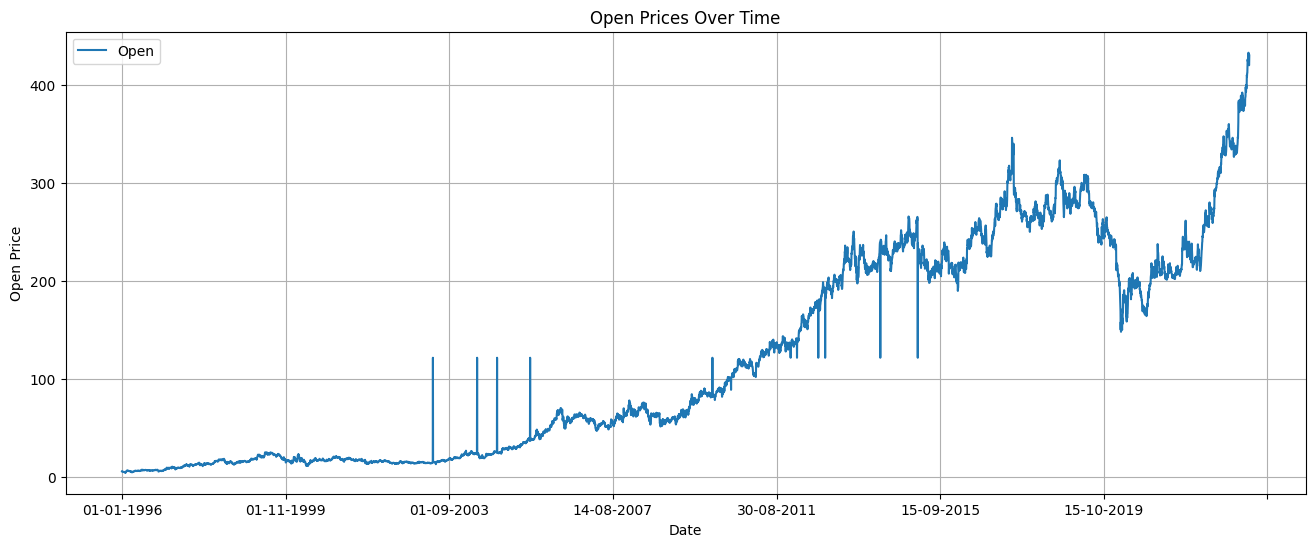

In [ ]:
df.set_index('Date', inplace=True)

# Plot the 'Open' prices with the Date as the x-axis
df['Open'].plot(figsize=(16, 6), title='Open Prices Over Time', legend=True)
plt.xlabel('Date')  # Label the x-axis
plt.ylabel('Open Price')  # Label the y-axis
plt.grid(True)
plt.show()

In [ ]:
corr = df.corr()['Close']
corr

,Close
Open,0.999768
High,0.999901
Low,0.999885
Volume,-0.306688
Close,1.000000


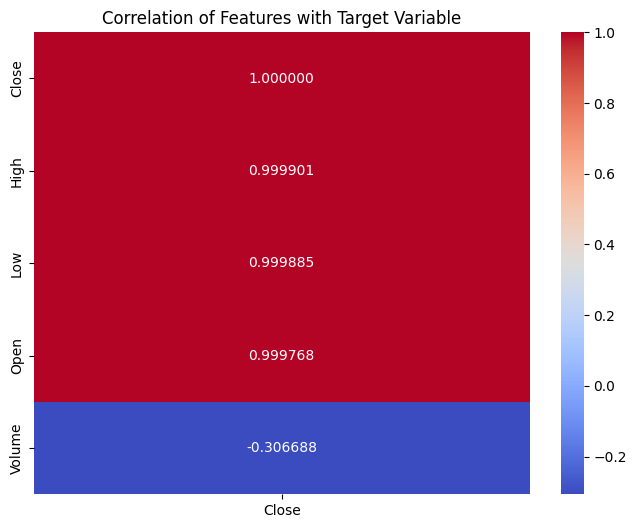

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr()[['Close']].sort_values(by='Close', ascending=False),
            annot=True, cmap='coolwarm',fmt='.6f')
plt.title("Correlation of Features with Target Variable")
plt.show()


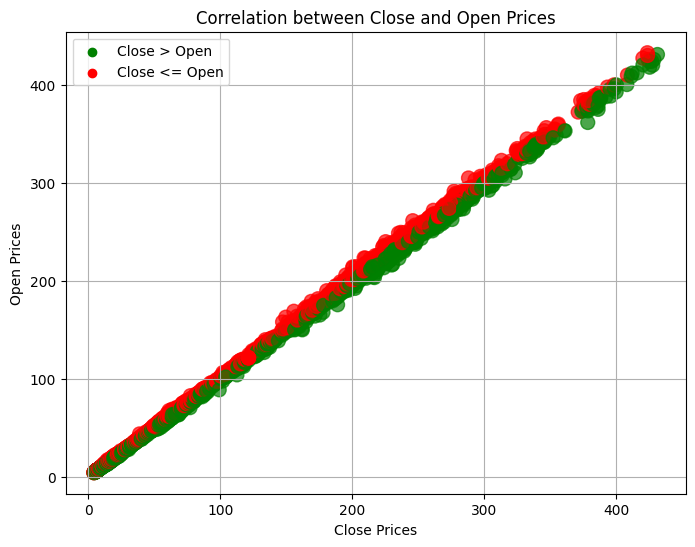

In [ ]:
# Define colors based on a condition: e.g., 'Close' > 'Open'
colors = np.where(df['Close'] > df['Open'], 'green', 'red')

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Close'], df['Open'], c=colors, alpha=0.7, s=100)
plt.title("Correlation between Close and Open Prices")
plt.xlabel("Close Prices")
plt.ylabel("Open Prices")

# Add legend manually
plt.scatter([], [], c='green', label='Close > Open')
plt.scatter([], [], c='red', label='Close <= Open')
plt.legend()

plt.grid(True)
plt.show()


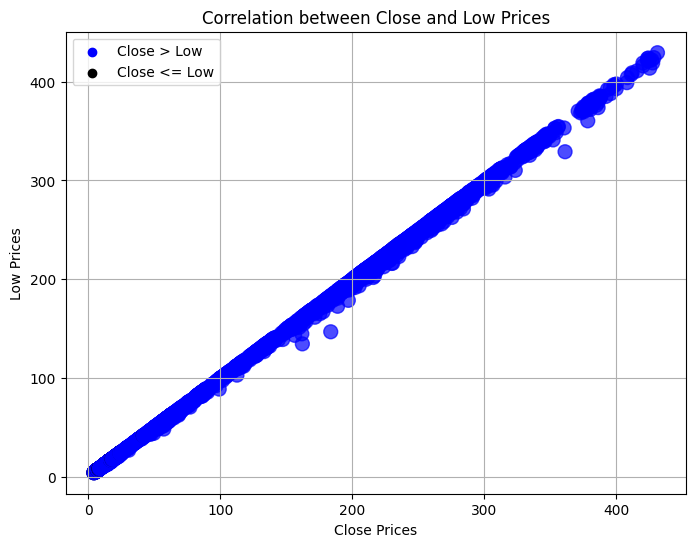

In [ ]:
# Define colors based on a condition: e.g., 'Close' > 'Low'
colors = np.where(df['Close'] > df['Low'], 'blue', 'black')

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Close'], df['Low'], c=colors, alpha=0.7, s=100)
plt.title("Correlation between Close and Low Prices")
plt.xlabel("Close Prices")
plt.ylabel("Low Prices")

# Add legend manually
plt.scatter([], [], c='blue', label='Close > Low')
plt.scatter([], [], c='black', label='Close <= Low')
plt.legend()

plt.grid(True)
plt.show()


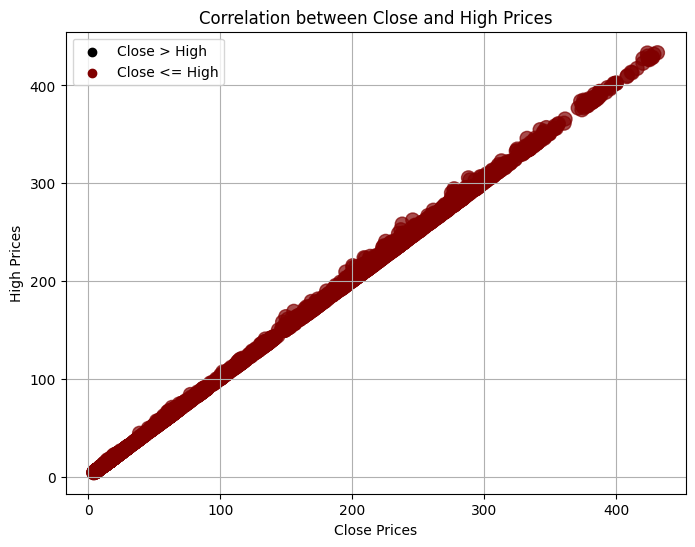

In [ ]:
# Define colors based on a condition: e.g., 'Close' > 'High'
colors = np.where(df['Close'] > df['High'], 'black', 'maroon')

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Close'], df['High'], c=colors, alpha=0.7, s=100)
plt.title("Correlation between Close and High Prices")
plt.xlabel("Close Prices")
plt.ylabel("High Prices")

# Add legend manually
plt.scatter([], [], c='black', label='Close > High')
plt.scatter([], [], c='maroon', label='Close <= High')
plt.legend()

plt.grid(True)
plt.show()


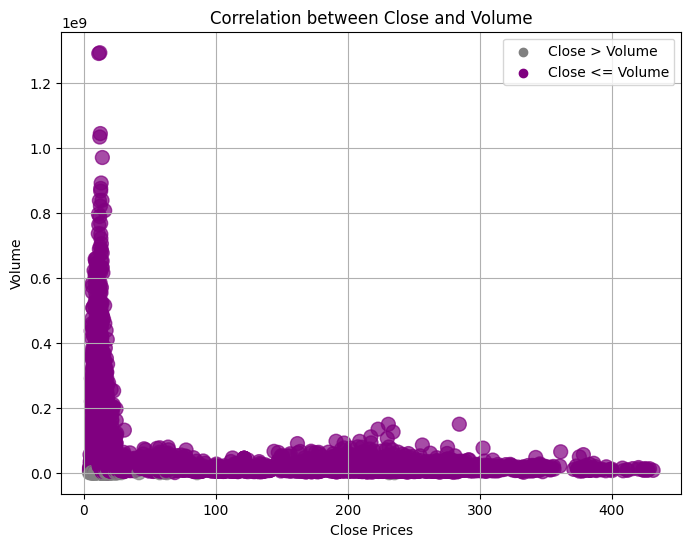

In [ ]:
# Define colors based on a condition: e.g., 'Close' > 'Volume'
colors = np.where(df['Close'] > df['Volume'], 'grey', 'purple')

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Close'], df['Volume'], c=colors, alpha=0.7, s=100)
plt.title("Correlation between Close and Volume")
plt.xlabel("Close Prices")
plt.ylabel("Volume")

# Add legend manually
plt.scatter([], [], c='grey', label='Close > Volume')
plt.scatter([], [], c='purple', label='Close <= Volume')
plt.legend()

plt.grid(True)
plt.show()


## **Spliting the data to training data and test data**

In [ ]:
x = df.drop(columns='Close',axis=1)
y = df['Close']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5512, 4), (1378, 4), (5512,), (1378,))

## **Data Standardization**

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
print(x_train)

[[-0.95465118 -0.95771878 -0.95432392 -0.19161583]
 [ 1.75622969  1.75417145  1.77971363 -0.37312791]
 [ 0.09917298  0.09142023  0.105226   -0.32805496]
 ...
 [ 1.22048248  1.20044884  1.22572852 -0.39016636]
 [ 1.5024547   1.47614588  1.44361984 -0.35539657]
 [-0.95822282 -0.95147834 -0.95584299  0.27844565]]


In [ ]:
print(x_test)

[[-0.99863884 -0.99870078 -0.99961113  0.10617874]
 [ 0.58134546  0.57267922  0.57015575 -0.1978014 ]
 [-0.99393931 -0.99553399 -0.99068661 -0.33398784]
 ...
 [-0.06935242 -0.06747813 -0.0782964  -0.36601289]
 [ 1.39530525  1.42026135  1.39377542 -0.20869583]
 [-0.54532151 -0.54873712 -0.54256155 -0.3714666 ]]


## **Model Training using Linear Regression**

In [ ]:
LRmodel = LinearRegression()
LRmodel.fit(x_train,y_train)
y_pred = LRmodel.predict(x_test)
print(y_pred)

[ 15.79830509 182.28063245  16.48930378 ... 114.17185558 272.4732109
  63.99756266]


In [ ]:
y_pred.shape

(1378,)

In [ ]:
dframe = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dframe.head(10)

,Actual,Predicted
Date,,
01-06-2000,15.46,15.798305
17-06-2020,181.20,182.280632
23-01-2002,16.50,16.489304
16-08-2006,60.30,60.552873
13-05-2022,258.60,259.193598
30-05-2006,58.83,59.379062
20-03-2003,13.91,13.938119
29-11-2017,258.05,257.660222
05-06-2009,63.78,64.356517


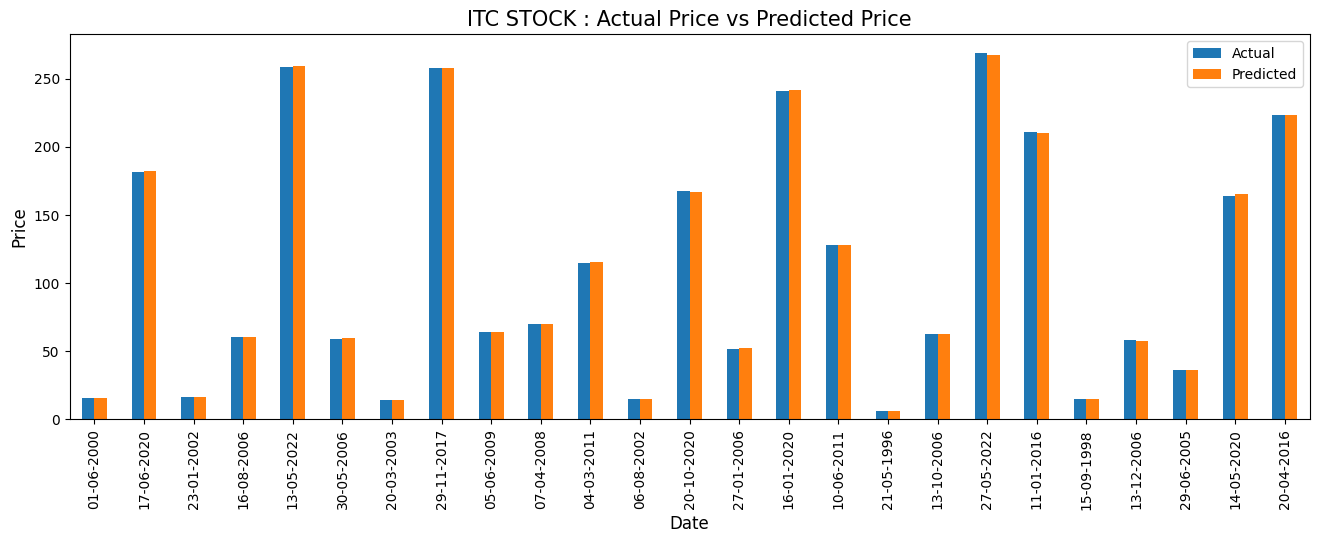

In [ ]:
graph = dframe.head(25)
graph.plot(kind='bar',figsize=(16,5))
plt.title("ITC STOCK : Actual Price vs Predicted Price", fontsize=15)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

## **Model Evaluation for Linear Regression Model**

In [ ]:
r2_score(y_test, y_pred)

0.999884066238908

In [ ]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error',metrics.mean_squared_error(y_test,y_pred))
import math
print ('Root Mean Squared Error',math.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error 0.564774466912428
Mean Squared Error 1.3041262317038838
Root Mean Squared Error 1.1419834638487039


## **Predictive Model using Linear Regression**

In [ ]:
input_data = (120,130,123,980000)

#changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the data
std_data = scaler.transform(input_data_reshaped)

prediction = LRmodel.predict(std_data)
print(prediction)
# predicting the close price

[130.12984327]


In [ ]:
input_data = (465.45,466.45,462.60,8823805)

#changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the data
std_data = scaler.transform(input_data_reshaped)

prediction = LRmodel.predict(std_data)
print(prediction)
# predicting the close price

[463.87728268]


## **Model Training using Support Vector Regressor**

In [ ]:
svr_model = SVR(kernel='linear', C=50, epsilon=0.2)
svr_model.fit(x_train, y_train)

SVR(C=50, epsilon=0.2, kernel='linear')

In [ ]:
prediction = svr_model.predict(x_test)
print(prediction)

[ 15.78699691 182.18550435  16.50436631 ... 114.10188452 272.44207497
  64.00406944]


In [ ]:
dframeS = pd.DataFrame({'Actual':y_test,'Predicted':prediction})
dframeS.head(10)

,Actual,Predicted
Date,,
01-06-2000,15.46,15.786997
17-06-2020,181.20,182.185504
23-01-2002,16.50,16.504366
16-08-2006,60.30,60.593271
13-05-2022,258.60,259.317527
30-05-2006,58.83,59.337018
20-03-2003,13.91,13.951485
29-11-2017,258.05,257.735181
05-06-2009,63.78,64.132758


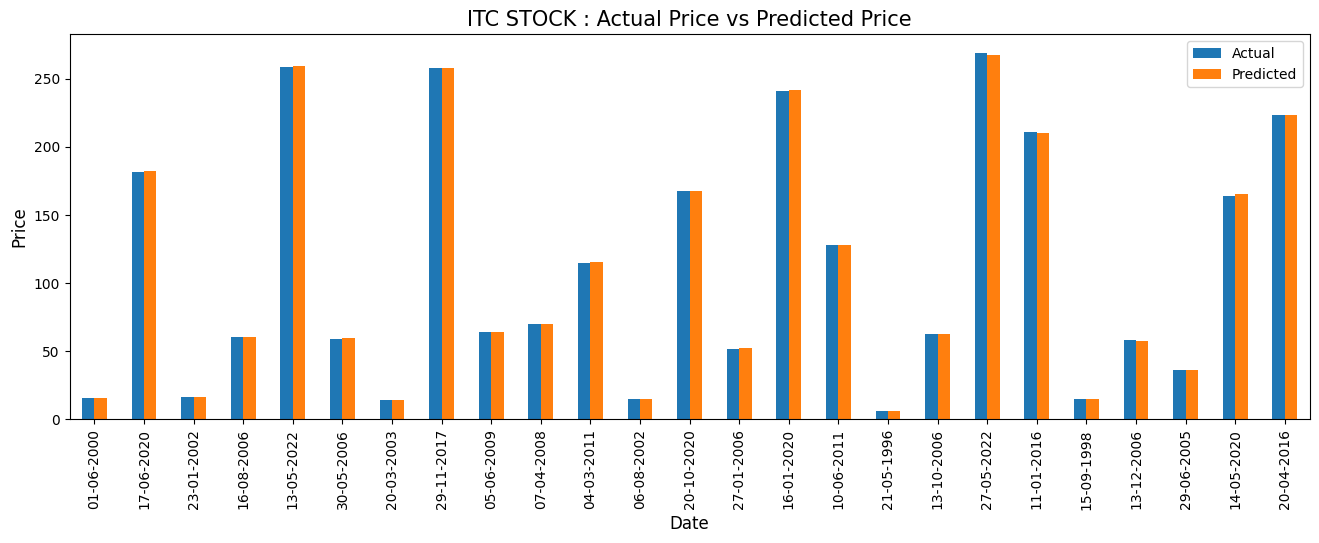

In [ ]:
graphS = dframeS.head(25)
graphS.plot(kind='bar',figsize=(16,5))
plt.title("ITC STOCK : Actual Price vs Predicted Price", fontsize=15)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

## **Model Evaluation for Support Vector Regressor Model**

In [ ]:
r2_score(y_test, prediction)

0.9998759043005752

In [ ]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,prediction))
print('Mean Squared Error',metrics.mean_squared_error(y_test,prediction))
import math
print ('Root Mean Squared Error',math.sqrt(metrics.mean_squared_error(y_test,prediction)))

Mean Absolute Error 0.5604446370532994
Mean Squared Error 1.3959389856524873
Root Mean Squared Error 1.181498618557164


## **Predictive Model for Support Vector Regressor**

In [ ]:
input_data = (120,130,123,980000)

#changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the data
std_data = scaler.transform(input_data_reshaped)

pred = svr_model.predict(std_data)
print(pred)
# predicting the close price

[130.41050458]


In [ ]:
input_data = (465.45,466.45,462.60,8823805)

#changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the data
std_data = scaler.transform(input_data_reshaped)

pred = svr_model.predict(std_data)
print(pred)
# predicting the close price

[463.93927574]
